In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer  # Habilita IterativeImputer
from sklearn.impute import IterativeImputer
df = pd.read_csv('hr_tratado2.csv', index_col=0)

### Este gráfica muestra la correlación entre columnas

In [4]:
# Filtrar por attrition
df_no = df[df['attrition'] == 'No']
df_yes = df[df['attrition'] == 'Yes']

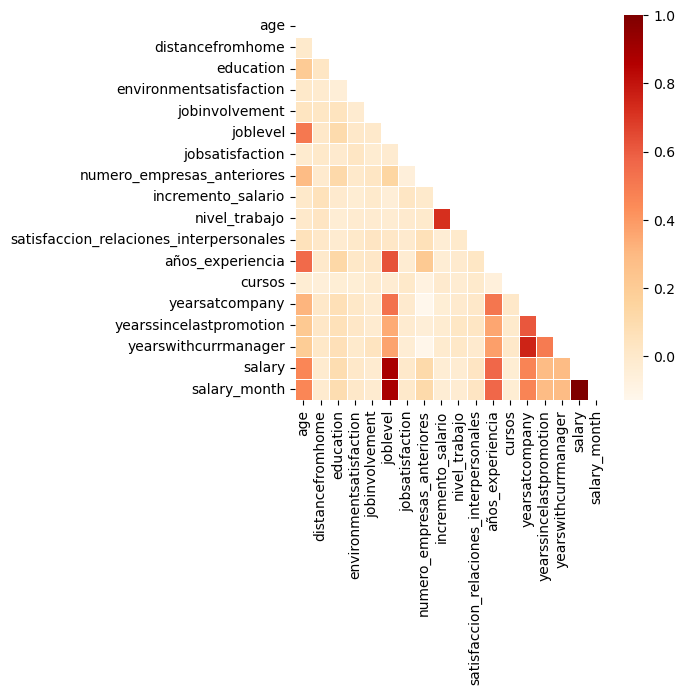

In [5]:
corr = df.select_dtypes(include=['number']).corr()
corr
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(5, 5))  # Tamaño de la figura
sns.heatmap(corr, cmap='OrRd', linewidths=0.5, mask = mask) #grosor linea
# Título
plt.title("")
# Mostrar la gráfica
plt.show()

### Relaciones
- edad: con salario, años de experiencia, joblevel (quizas education)
- joblevel: con salario(alto), yearsatcompany (años en la compañia),años de experiencia
- numero de empresa anteriores: años de experiencia * van a esta empresa a jubilarse? *
- incremento de salario: fuerte con nivel de trabajo 
- años de experiencia: salario, años con el mismo manager, años de la ultima promoción, años en la compñia (todo sube proporcionalmente)
- años en la compañia: salario, años con el mismo manager, años desde la ultima promocion
- años desde la ultima promoción: años con el mismo manager (vamos, hay un manager que no promociona nada)


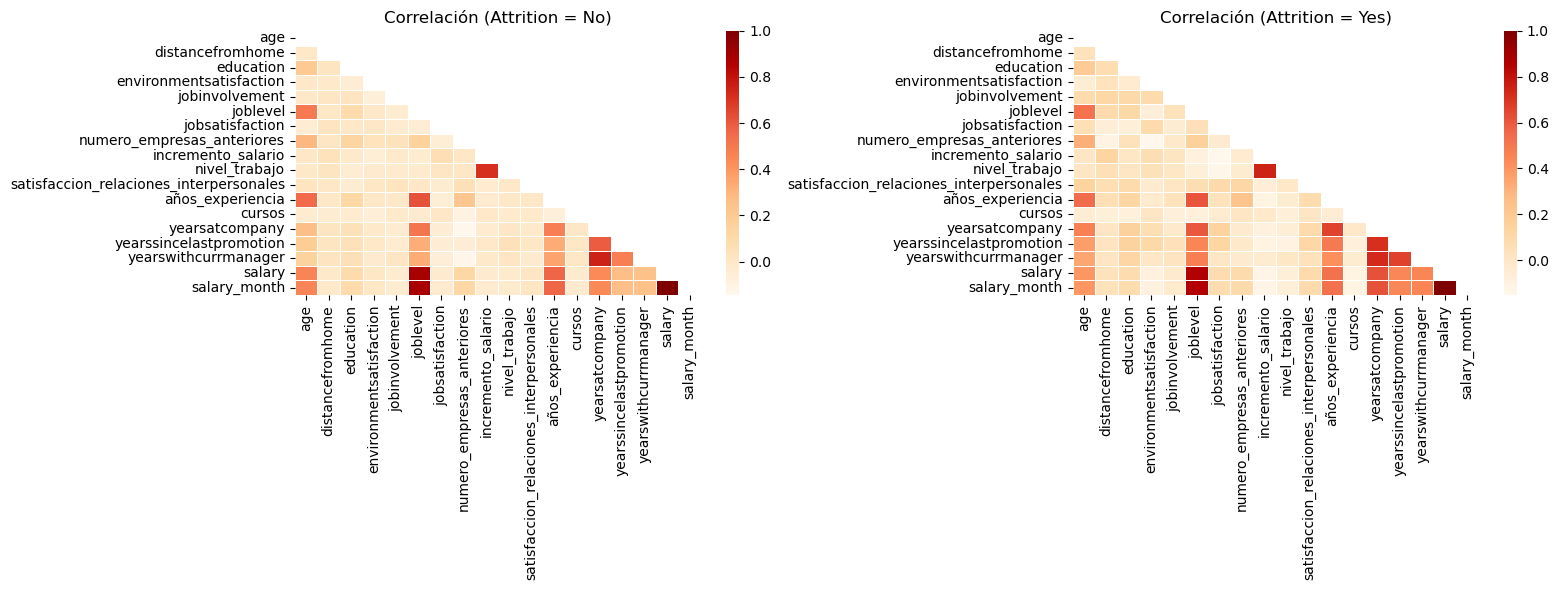

In [6]:

# Filtrar por attrition
df_no = df[df['attrition'] == 'No']
df_yes = df[df['attrition'] == 'Yes']

# Calcular correlaciones
corr_no = df_no.select_dtypes(include=['number']).corr()
corr_yes = df_yes.select_dtypes(include=['number']).corr()

# Máscara para mostrar solo la mitad inferior
mask = np.triu(np.ones_like(corr_no, dtype=bool))

# Crear figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Heatmap empleados que NO se fueron
sns.heatmap(corr_no, cmap='OrRd', linewidths=0.5, mask=mask, 
            annot=False,  ax=axes[0])
axes[0].set_title("Correlación (Attrition = No)")

# Heatmap empleados que SÍ se fueron
sns.heatmap(corr_yes, cmap='OrRd', linewidths=0.5, mask=mask, 
            annot=False, ax=axes[1])
axes[1].set_title("Correlación (Attrition = Yes)")

plt.tight_layout()
plt.show()


## Creacion del DF balanceado

In [7]:

from sklearn.utils import resample
df_yes = df[df['attrition']=="Yes"]
df_no = df[df['attrition']=="No"]

# ubmuestreo del grupo mayoritario (undersampling)
#Reunir dataset balanceado
# El resultado (df_balanced) tiene el mismo número de empleados con Attrition = Yes que con Attrition = No.

df_no_down = resample(df_no, replace=False, n_samples=len(df_yes), random_state=42)
df_balanced = pd.concat([df_yes, df_no_down])

## Perfil del empleado que se ha marcado


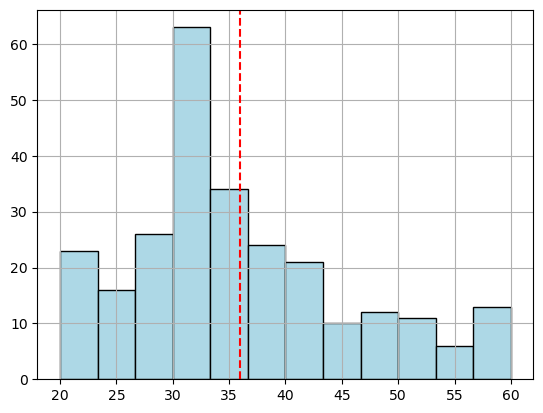

In [58]:
# Edad

plt.hist(df_yes['age'], bins=12, color="lightblue", edgecolor='black')
plt.axvline(round(df_yes['age'].mean()), color='red', linestyle='--', label=f"Media: {round(df_yes['age'].mean())}")
plt.grid(True)
plt.show();


In [59]:
df_yes['age'].mean()

np.float64(35.803088803088805)

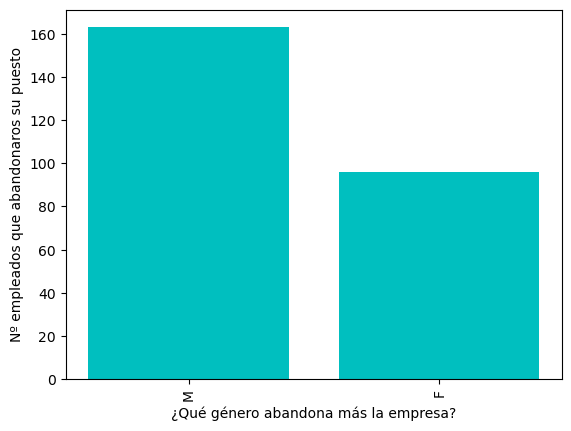

In [60]:
valores = df_yes['gender'].value_counts().sort_values(ascending=False)
valores
plt.bar(x=valores.index, height=valores.values, color='c')
plt.xticks(rotation=90)
plt.xlabel("¿Qué género abandona más la empresa?")
plt.ylabel("Nº empleados que abandonaros su puesto")
plt.show()


In [11]:
df_no.columns

Index(['age', 'attrition', 'businesstravel', 'distancefromhome', 'education',
       'educationfield', 'environmentsatisfaction', 'gender', 'jobinvolvement',
       'joblevel', 'jobrole', 'jobsatisfaction', 'maritalstatus',
       'numero_empresas_anteriores', 'horas_extra', 'incremento_salario',
       'nivel_trabajo', 'satisfaccion_relaciones_interpersonales',
       'clasificacion_jornada', 'años_experiencia', 'cursos',
       'worklifebalance', 'yearsatcompany', 'yearssincelastpromotion',
       'yearswithcurrmanager', 'salary', 'remotework', 'salary_month'],
      dtype='object')

## Nivel de estudios de la gente que se marcha
- nievl 1 ESO
- nivel 2 bachicher
- nivel 3 FP
- nivel 4 Carrera universitaria
- nivel 5 MAster MBA

Se marcahn más los empleados que tinen estudios como la FP y universirarios

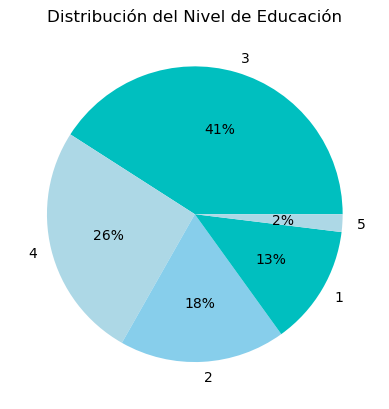

In [61]:
valores = df_yes['education'].value_counts()
categorias = valores.index
plt.pie(valores, labels=categorias, autopct='%1.0f%%',colors=['c', 'lightblue', 'skyblue'])
plt.title("Distribución del Nivel de Educación")
plt.show()



## El estado civil influye??
- a pesar de que hay mucho unkwon, se van sobretodo los casados

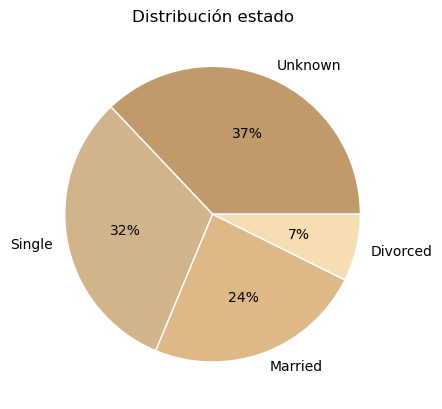

In [63]:
valores = df_yes['maritalstatus'].value_counts()
colores_ocre = ['#C19A6B', '#D2B48C', '#DEB887', '#F5DEB3', '#EED8AE']


categorias = valores.index
plt.pie(valores, labels=categorias, autopct='%1.0f%%',colors=colores_ocre, wedgeprops={'edgecolor': 'white'})
plt.title("Distribución estado")
plt.show()

## Trabajo en remoto
- Sorpresa: la gente que más se marcha eran los que tienen teletrabajo
- No tiene nada que ver, solo dice que se van mas los que teletrabajan

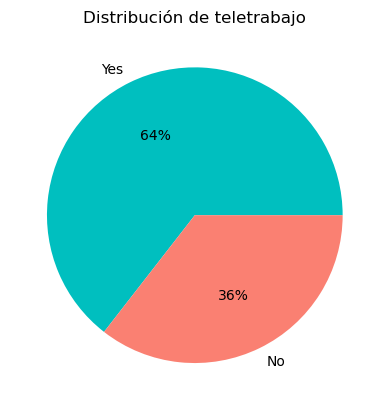

In [64]:
valores = df_yes['remotework'].value_counts()
categorias = valores.index
plt.pie(valores, labels=categorias, autopct='%1.0f%%',colors=['c', 'salmon', 'skyblue'])
plt.title("Distribución de teletrabajo")
plt.show()



# Distancia al trabajo
- Me gustaria probar con el balanceado
- No influye a la hora de irse de la empresa

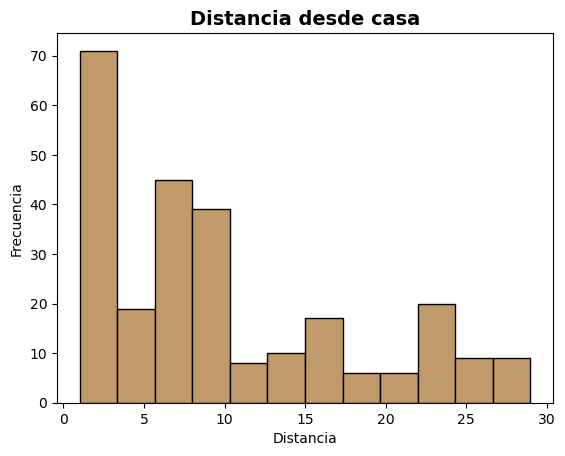

In [65]:
plt.hist(df_yes['distancefromhome'], bins=12, color="#C19A6B", edgecolor='black')
plt.title("Distancia desde casa", fontsize=14, fontweight='bold')
plt.xlabel("Distancia")
plt.ylabel("Frecuencia")
plt.show()

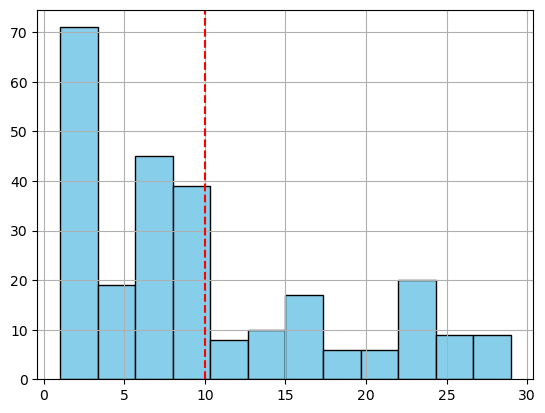

In [66]:

plt.hist(df_yes['distancefromhome'], bins=12, color="skyblue", edgecolor='black')
plt.axvline(round(df_yes['distancefromhome'].mean()), color='red', linestyle='--', label=f"Media: {round(df_yes['distancefromhome'].mean())}")
plt.grid(True)
plt.show();

## Formación
- Aprovechan la formación, pero sobretodo abandonan el puesto los que tienen 2 cursos por año

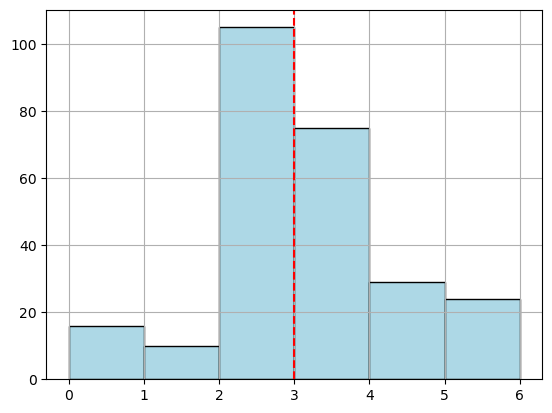

In [71]:

plt.hist(df_yes['cursos'], bins=6, color="lightblue", edgecolor='black')
plt.axvline(round(df_yes['cursos'].mean()), color='red', linestyle='--', label=f"Media: {round(df_yes['cursos'].mean())}")
plt.grid(True)
plt.show();

## Que puestos tienen mas rotacion
- Sales executive
- Reseach Scientist
- Laboraty Technician

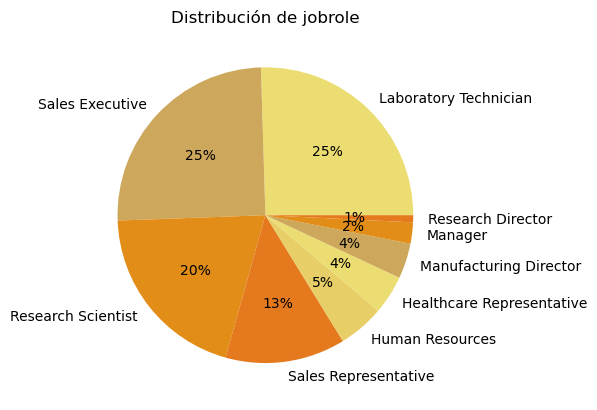

In [72]:

valores = df_yes['jobrole'].value_counts()
categorias = valores.index
plt.pie(valores, labels=categorias, autopct='%1.0f%%',colors=["#EBDD72", "#CDA75B", "#E18D18", "#E47A1D", "#E8CE66"])
plt.title("Distribución de jobrole")
plt.show()

# Filtrar con salarios*****
# Filtrar con incremento**

## La mayoria 

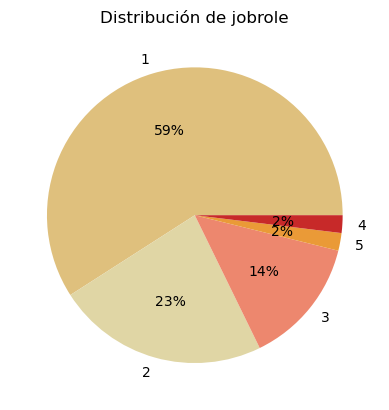

In [73]:

valores = df_yes['joblevel'].value_counts()
categorias = valores.index
plt.pie(valores, labels=categorias, autopct='%1.0f%%',colors=["#DFC07D", "#E0D6A5", "#ED876E", "#EA9A37", "#C72929"])
plt.title("Distribución de jobrole")
plt.show()


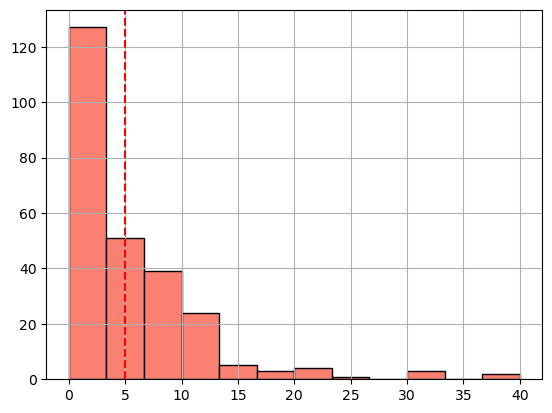

In [75]:
#Años en la Compañía:
#Se piran los que menos años llevan

plt.hist(df_yes['yearsatcompany'], bins=12, color="salmon", edgecolor='black')
plt.axvline(round(df_yes['yearsatcompany'].mean()), color='red', linestyle='--', label=f"Media: {round(df_yes['yearsatcompany'].mean())}")
plt.grid(True)
plt.show();

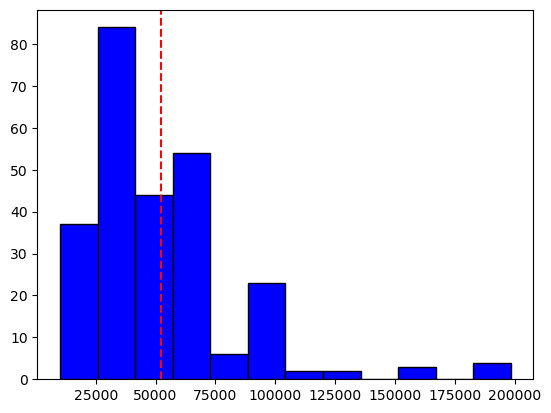

In [78]:

plt.hist(df_yes['salary'], bins=12, color="blue", edgecolor='black')
plt.axvline(round(df_yes['salary'].mean()), color='red', linestyle='--', label=f"Media: {round(df_yes['salary'].mean())}")

plt.show();

In [88]:
print(f'Salario medio: {df_yes['salary'].mean().round(2)}')
print(f'Salario maximo {df_yes['salary'].max()}')
print(f'Salario minimo {df_yes['salary'].min()}')
print(f'Desviación {df_yes['salary'].std()}')

Salario medio: 52081.91
Salario maximo 198450.0
Salario minimo 10090.0
Desviación 32783.42582846906


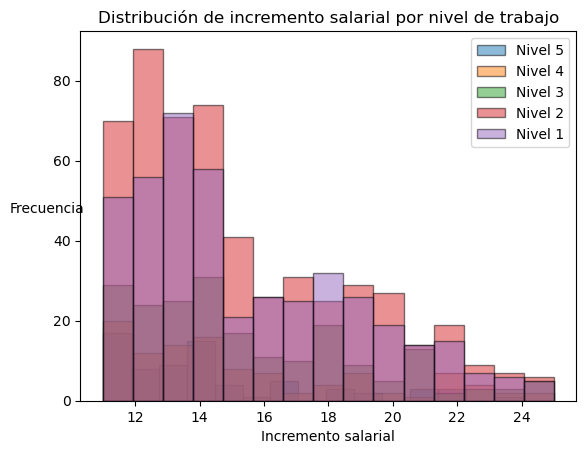

In [20]:
#INCREMENTO SALARIO---NIVEL TRABAJO
df_job = df_no[df_no['joblevel']=='Sales executive']

for level in df_no['joblevel'].unique():
    subset = df_no[df_no['joblevel'] == level]['incremento_salario']
    plt.hist(subset, bins=15, alpha=0.5, label=f'Nivel {level}', edgecolor='black')

plt.title('Distribución de incremento salarial por nivel de trabajo')
plt.xlabel('Incremento salarial')
plt.ylabel('Frecuencia', rotation=0)
plt.legend()
plt.show()

In [21]:
df_no['jobrole'].unique()

array(['Research Director', 'Manager', 'Sales Executive',
       'Manufacturing Director', 'Research Scientist',
       'Healthcare Representative', 'Laboratory Technician',
       'Sales Representative', 'Human Resources'], dtype=object)

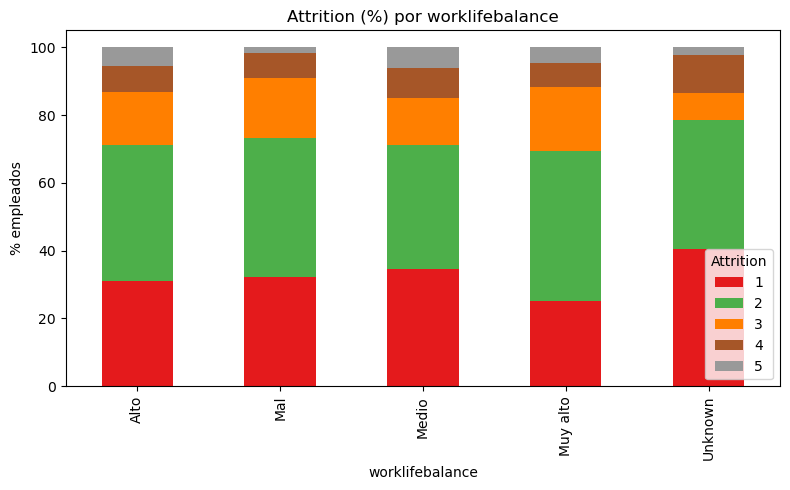

In [82]:
# tabla de frecuencias crea una tabla cruzada entre dos columnas categóricas.
# Filas = categorías de worklifebalance.Columnas = categorías de attrition (Yes/No).
#normalize='index' normaliza cada fila para que sume 1.convierte a porcentajes.
#Genera un gráfico de barras.#kind='bar'tipo barras verticales.
# stacked=True apila los segmentos (Yes/No) en cada barra.figsize=(8,5)tamaño de la figura en pulgadas.
#colormap="Set1" paleta de colores de matplotlib/seaborn.

tab = pd.crosstab(df_no['worklifebalance'],df_no['joblevel'], normalize='index') * 100 
tab.plot(kind='bar', stacked=True, figsize=(8,5), colormap="Set1")
plt.ylabel('% empleados')
plt.title(' (%) por worklifebalance')
plt.legend(title='Attrition')
plt.tight_layout()
plt.show()

In [81]:
df_no.columns

Index(['age', 'attrition', 'businesstravel', 'distancefromhome', 'education',
       'educationfield', 'environmentsatisfaction', 'gender', 'jobinvolvement',
       'joblevel', 'jobrole', 'jobsatisfaction', 'maritalstatus',
       'numero_empresas_anteriores', 'horas_extra', 'incremento_salario',
       'nivel_trabajo', 'satisfaccion_relaciones_interpersonales',
       'clasificacion_jornada', 'años_experiencia', 'cursos',
       'worklifebalance', 'yearsatcompany', 'yearssincelastpromotion',
       'yearswithcurrmanager', 'salary', 'remotework', 'salary_month'],
      dtype='object')

### Distancia desde la oficina
- Aqui se ve claramente que la gente que ya no está, si que vivia algo mas lejos de la gente que está
(tanto los que se quedan = No,como los que se van = Yes) tienen su mayor concentración en distancias muy bajas (0–5 km aprox.).
Las curvas casi se solapadan y no hay un desplazamiento fuerte que indique que “irse” esté asociado a vivir más lejos.
La distancia a casa no es un factor decisivo de la rotación en esta empresa.
La mayoría vive cerca del trabajo.
Asi que los motivos de rotación hay que buscarlos en otras variables (satisfacción, salario, rol, oportunidades de promoción)

<Axes: xlabel='distancefromhome', ylabel='Density'>

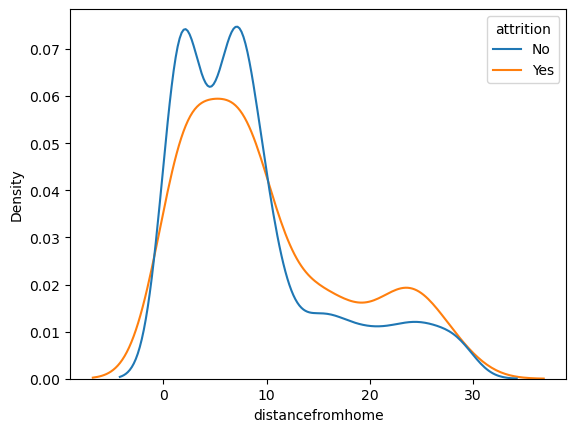

In [23]:
sns.kdeplot(data=df, x="distancefromhome", hue="attrition", common_norm=False)
#KDE plot (Kernel Density Estimation) es una curva suave que representa la distribución de una variable numérica. Es como un histograma, pero continuo.
#hue="attrition", dibuja dos curvas, una para los empleados que se quedan (No) y otra para los que se van (Yes).
#Es útil porque no solo muestra la media, sino toda la forma de la distribución.

<Axes: xlabel='gender', ylabel='count'>

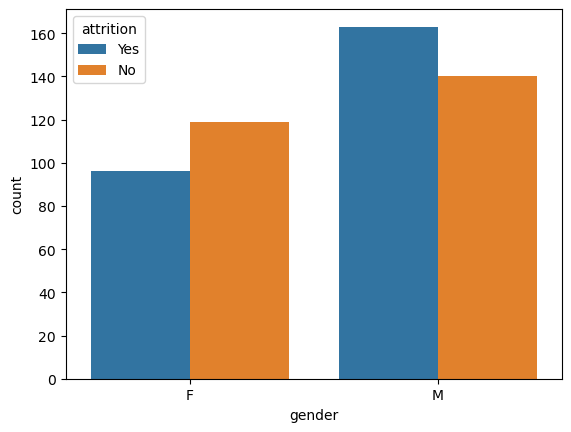

In [24]:
sns.countplot(x="gender", hue="attrition", data=df_balanced)

C:\Users\ganto\AppData\Local\Temp\ipykernel_46980\21235202.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x="attrition", y="age", data=df, ci=95, palette="Set2")
C:\Users\ganto\AppData\Local\Temp\ipykernel_46980\21235202.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="attrition", y="age", data=df, ci=95, palette="Set2")


<Axes: xlabel='attrition', ylabel='age'>

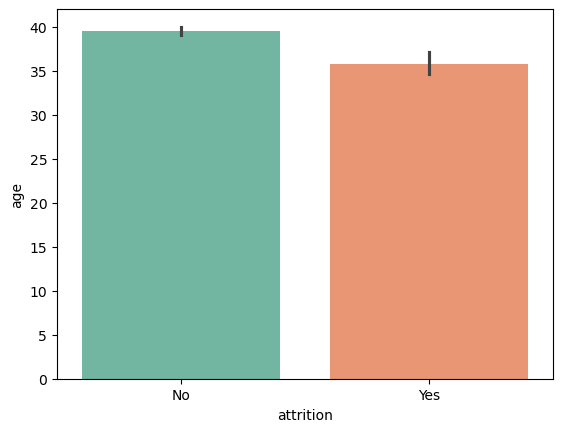

In [25]:
sns.barplot(x="attrition", y="age", data=df, ci=95, palette="Set2")


<Axes: xlabel='age', ylabel='Percent'>

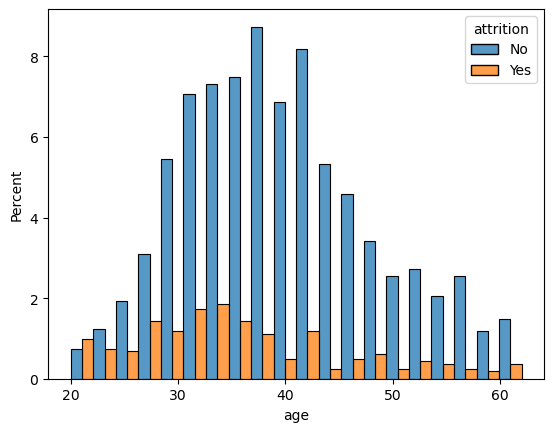

In [26]:
sns.histplot(data=df, x="age", hue="attrition", stat="percent", multiple="dodge", bins=20)


In [27]:
from sklearn.utils import resample

# 1. Separación en dos grupos

df_yes = df[df['attrition']=="Yes"]
df_no = df[df['attrition']=="No"]

# ubmuestreo del grupo mayoritario (undersampling)
#Reunir dataset balanceado
# El resultado (df_balanced) tiene el mismo número de empleados con Attrition = Yes que con Attrition = No.

df_no_down = resample(df_no, replace=False, n_samples=len(df_yes), random_state=42)
df_balanced = pd.concat([df_yes, df_no_down])

<Axes: xlabel='age', ylabel='Percent'>

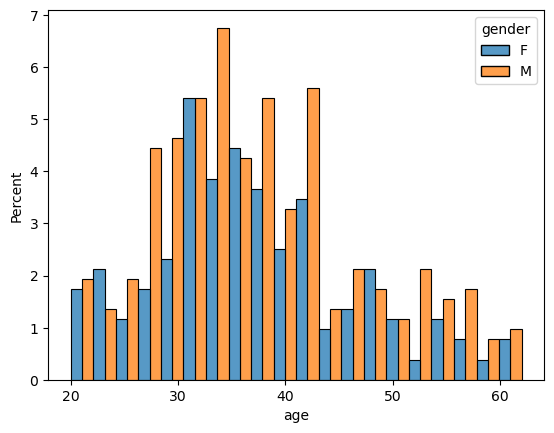

In [28]:
sns.histplot(data=df_balanced, x="age", hue="gender", stat="percent", multiple="dodge", bins=20)

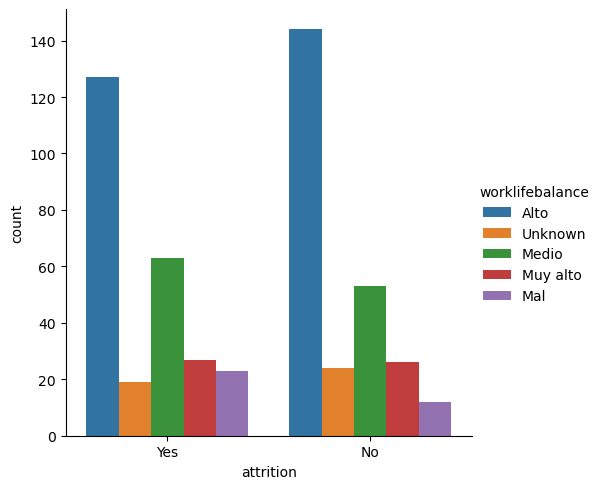

In [29]:
sns.catplot(x="attrition", hue="worklifebalance", kind="count", data=df_balanced)


## Attrition vs Edad
- el pico de edad de la gente que se marcha es entre 30 y 40

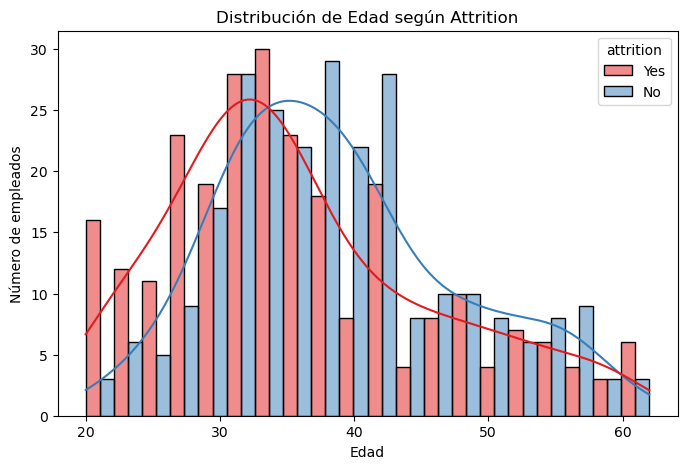

In [30]:
plt.figure(figsize=(8,5))
sns.histplot(data=df_balanced, x="age", hue="attrition", bins=20, multiple="dodge", kde=True, palette="Set1")
plt.title("Distribución de Edad según Attrition")
plt.xlabel("Edad")
plt.ylabel("Número de empleados")
plt.show()

In [31]:
media_no= df_no['age'].mean()
print('La media de la gente que se va es: ',media_no)

La media de la gente que se va es:  39.52029520295203


In [32]:
media_yes= df_yes['age'].mean()
print('La media de la gente se mantiene es: ',media_yes)

La media de la gente se mantiene es:  35.803088803088805


## Estas dos grafocas:
- No hay mucha igualdad con los salarios

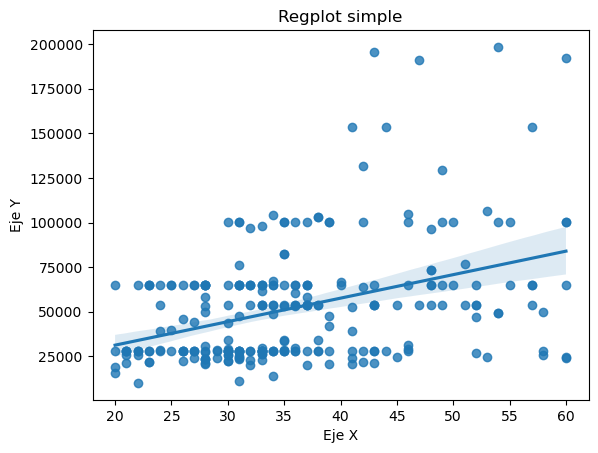

In [33]:
sns.regplot(x=df_yes['age'], y=df_yes['salary'])

plt.title("Regplot simple")
plt.xlabel("Eje X")
plt.ylabel("Eje Y")

plt.show()

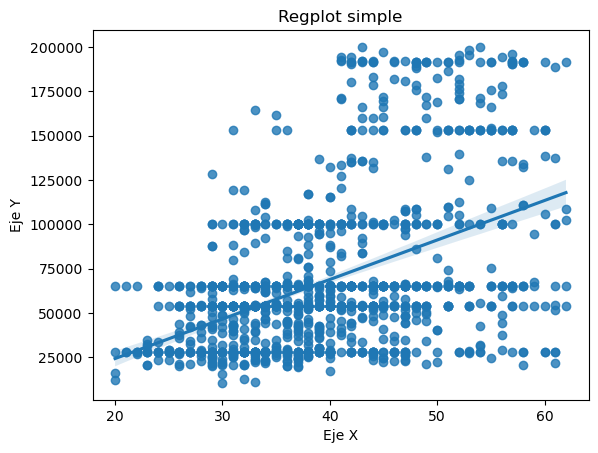

In [34]:
sns.regplot(x=df_no['age'], y=df_no['salary'])

plt.title("Regplot simple")
plt.xlabel("Eje X")
plt.ylabel("Eje Y")

plt.show()

## comparación entre edad y satisfaccion

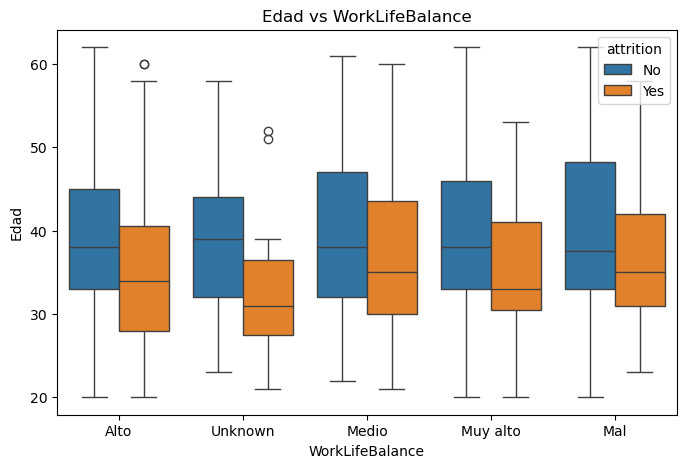

In [35]:
plt.figure(figsize=(8,5))
sns.boxplot(x="worklifebalance", y="age", data=df, hue="attrition")
plt.title("Edad vs WorkLifeBalance")
plt.xlabel("WorkLifeBalance")
plt.ylabel("Edad")
plt.show()


C:\Users\ganto\AppData\Local\Temp\ipykernel_46980\484735602.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="worklifebalance", y="age", data=df, hue="attrition", ci=None)


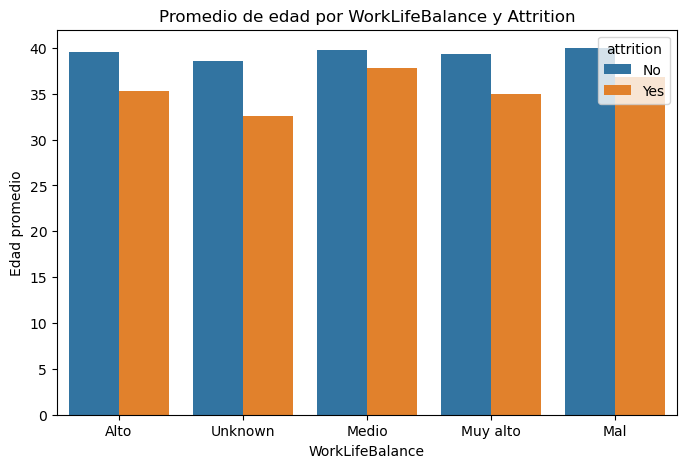

In [36]:
plt.figure(figsize=(8,5))
sns.barplot(x="worklifebalance", y="age", data=df, hue="attrition", ci=None)
plt.title("Promedio de edad por WorkLifeBalance y Attrition")
plt.xlabel("WorkLifeBalance")
plt.ylabel("Edad promedio")
plt.show()

## Que puestos son los que predominan y no se van

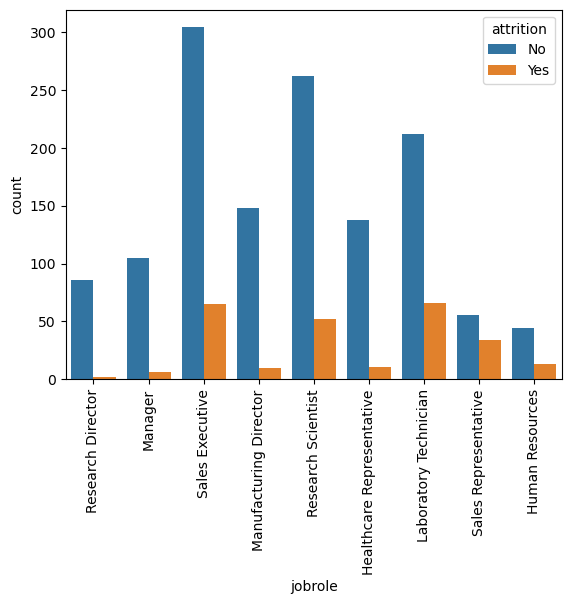

In [37]:
sns.countplot(x="jobrole", hue="attrition", data=df)
plt.xticks(rotation=90)
plt.show();

## Los puestos más intermedios son los que más se van

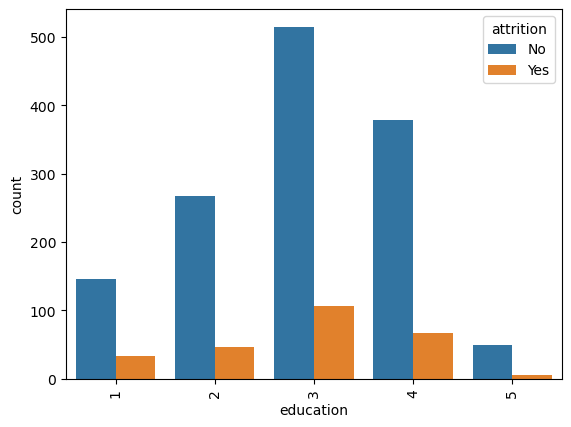

In [38]:
sns.countplot(x="education", hue="attrition", data=df)
plt.xticks(rotation=90)
plt.show();

## Curiosamente, se van mas los que tienen teletrabajo

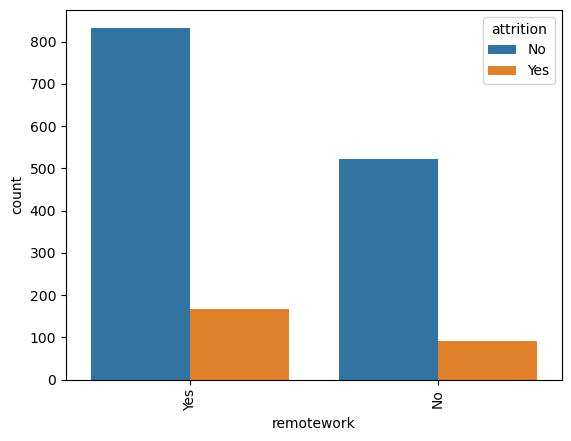

In [39]:
sns.countplot(x="remotework", hue="attrition", data=df)
plt.xticks(rotation=90)
plt.show();

## En realidad, los que mas se han ido son los que cobraban menos de 70.000 al año

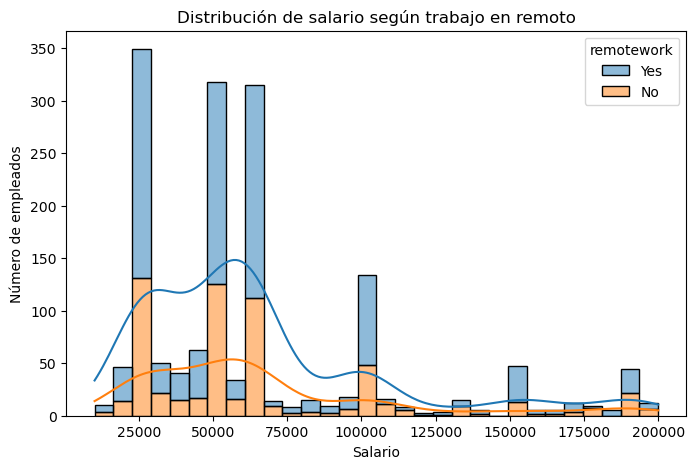

In [40]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="salary", hue="remotework", bins=30, kde=True, multiple="stack")
plt.title("Distribución de salario según trabajo en remoto")
plt.xlabel("Salario")
plt.ylabel("Número de empleados")
plt.show()

C:\Users\ganto\AppData\Local\Temp\ipykernel_46980\2020997748.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="remotework", y="salary", data=df, hue="attrition", ci=None)


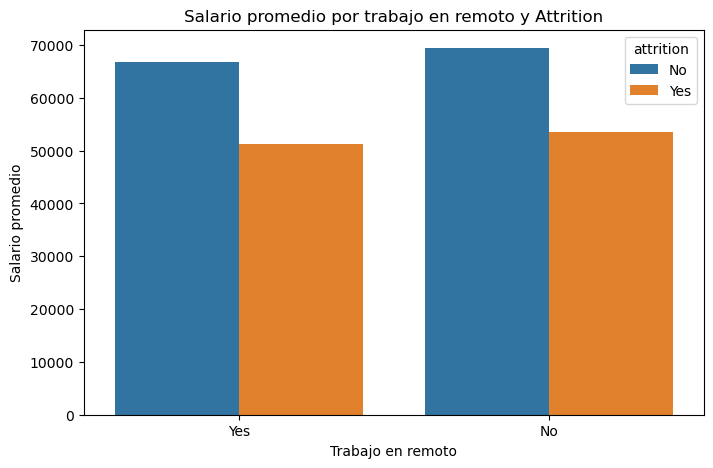

In [41]:
plt.figure(figsize=(8,5))
sns.barplot(x="remotework", y="salary", data=df, hue="attrition", ci=None)
plt.title("Salario promedio por trabajo en remoto y Attrition")
plt.xlabel("Trabajo en remoto")
plt.ylabel("Salario promedio")
plt.show()